In [116]:
# Load all the required libraries
library(caret)
library(MASS)
library(car)
library(caret)
library(verification)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(shiny)
library(naniar)
library(ggcorrplot)
library(dplyr)
library(gridExtra)
library(Metrics)
library(pROC)
set.seed(123)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:Metrics’:

    auc


The following object is masked from ‘package:verification’:

    lines.roc


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [10]:
install.packages("naniar")

also installing the dependencies ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’





The downloaded binary packages are in
	/var/folders/6j/vbxn4v7s5xl046hwx1j8ppnm0000gn/T//RtmpCCF9Dn/downloaded_packages


## 1. Load and Inspect the Data

In [7]:
# Load data and set factors
housing_df <- read.csv("housing.csv", stringsAsFactors = TRUE)
housing_df$ptRatioBin <- as.factor(housing_df$ptRatioBin)

# Check dimensions
dim(housing_df)
str(housing_df)

# View first/last rows
head(housing_df)
tail(housing_df)

# Get summary statistics
summary(housing_df)

[1] 506  10

'data.frame':	506 obs. of  10 variables:
 $ crim      : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn        : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus     : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ rm        : num  6.58 6.42 7.18 7 7.15 ...
 $ age       : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis       : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad       : int  1 2 2 3 3 3 5 5 5 5 ...
 $ HouseValue: num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ NoxGroups : Factor w/ 3 levels "High","Low","Medium": 3 2 2 2 2 2 3 3 3 3 ...
 $ ptRatioBin: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


,crim,zn,indus,rm,age,dis,rad,HouseValue,NoxGroups,ptRatioBin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
1,0.00632,18,2.31,6.575,65.2,4.0900,1,24.0,Medium,0
2,0.02731,0,7.07,6.421,78.9,4.9671,2,21.6,Low,0
3,0.02729,0,7.07,7.185,61.1,4.9671,2,34.7,Low,0
4,0.03237,0,2.18,6.998,45.8,6.0622,3,33.4,Low,0
5,0.06905,0,2.18,7.147,54.2,6.0622,3,36.2,Low,0
6,0.02985,0,2.18,6.430,58.7,6.0622,3,28.7,Low,0


,crim,zn,indus,rm,age,dis,rad,HouseValue,NoxGroups,ptRatioBin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>
501,0.22438,0,9.69,6.027,79.7,2.4982,6,16.8,Medium,0
502,0.06263,0,11.93,6.593,69.1,2.4786,1,22.4,Medium,1
503,0.04527,0,11.93,6.120,76.7,2.2875,1,20.6,Medium,1
504,0.06076,0,11.93,6.976,91.0,2.1675,1,23.9,Medium,1
505,0.10959,0,11.93,6.794,89.3,2.3889,1,22.0,Medium,1
506,0.04741,0,11.93,6.030,80.8,2.5050,1,11.9,Medium,1


      crim                zn             indus             rm       
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :3.561  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:5.886  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :6.208  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :6.285  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:6.623  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :8.780  
      age              dis              rad           HouseValue   
 Min.   :  2.90   Min.   : 1.130   Min.   : 1.000   Min.   : 5.00  
 1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000   1st Qu.:17.02  
 Median : 77.50   Median : 3.207   Median : 5.000   Median :21.20  
 Mean   : 68.57   Mean   : 3.795   Mean   : 9.549   Mean   :22.53  
 3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000   3rd Qu.:25.00  
 Max.   :100.00   Max.   :12.127   Max.   :24.000   Max.   :50.00  
  NoxGroups   ptRatioBin
 High  :171   0:

## Check for missing values

In [12]:
# Count missing values per column
colSums(is.na(housing_df))

crim         zn      indus         rm        age        dis        rad 
         0          0          0          0          0          0          0 
HouseValue  NoxGroups ptRatioBin 
         0          0          0

# Check for duplicates 

In [23]:
# Find duplicate rows
sum(duplicated(housing_df))
housing_df[duplicated(housing_df), ]

[1] 0

crim,zn,indus,rm,age,dis,rad,HouseValue,NoxGroups,ptRatioBin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>


## Explore target variable distribution

[1] 1.101537

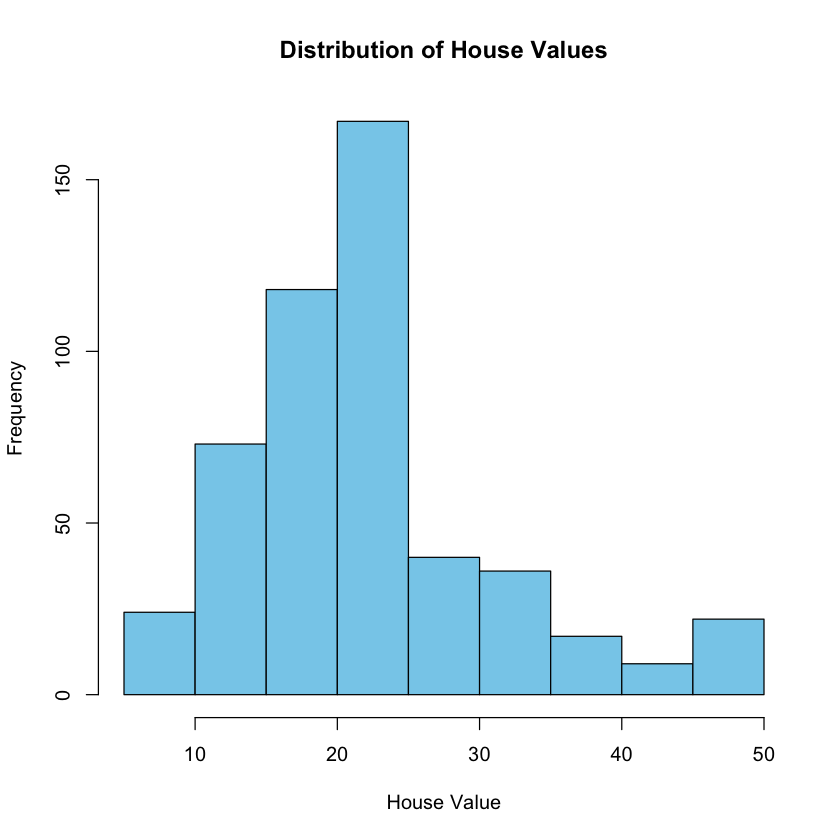

In [19]:
# Histogram of target variable
hist(housing_df$HouseValue, main="Distribution of House Values", 
     xlab="House Value", col="skyblue")

# Check for skewness
library(e1071)

skewness(housing_df$HouseValue)

The distribuation is right skewed although there are some outliers on the right side
Most house priced around 20k, distribution is not normal and can affect result of lineer regression

# Check for outliers

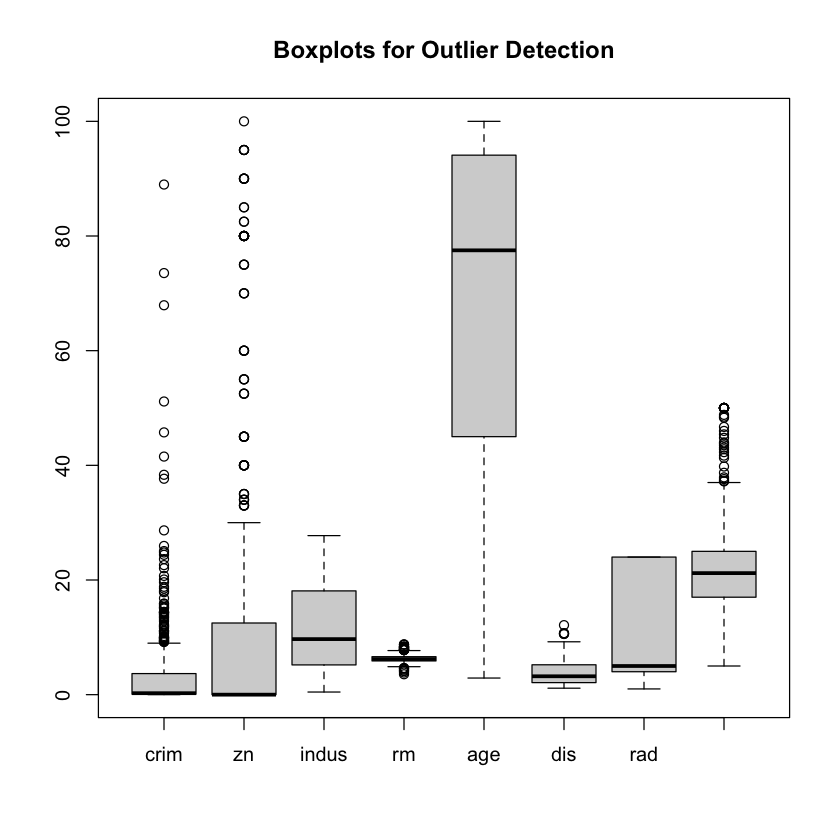

In [17]:
# Boxplots for numerical variables
boxplot(housing_df[, sapply(housing_df, is.numeric)], 
        main="Boxplots for Outlier Detection")

# Z-score method
z_scores <- scale(housing_df[, sapply(housing_df, is.numeric)])
outliers <- which(abs(z_scores) > 3, arr.ind=TRUE)

crim - Extremely right skewed with countless of outliers
zn(residential land zoned) - many outliers as well 
age - centered around old units 
rm - fairly normal 


## Analyse correlations

                 crim         zn      indus         rm        age        dis
crim        1.0000000 -0.2004692  0.4065834 -0.2192467  0.3527343 -0.3796701
zn         -0.2004692  1.0000000 -0.5338282  0.3119906 -0.5695373  0.6644082
indus       0.4065834 -0.5338282  1.0000000 -0.3916759  0.6447785 -0.7080270
rm         -0.2192467  0.3119906 -0.3916759  1.0000000 -0.2402649  0.2052462
age         0.3527343 -0.5695373  0.6447785 -0.2402649  1.0000000 -0.7478805
dis        -0.3796701  0.6644082 -0.7080270  0.2052462 -0.7478805  1.0000000
rad         0.6255051 -0.3119478  0.5951293 -0.2098467  0.4560225 -0.4945879
HouseValue -0.3883046  0.3604453 -0.4837252  0.6953599 -0.3769546  0.2499287
                  rad HouseValue
crim        0.6255051 -0.3883046
zn         -0.3119478  0.3604453
indus       0.5951293 -0.4837252
rm         -0.2098467  0.6953599
age         0.4560225 -0.3769546
dis        -0.4945879  0.2499287
rad         1.0000000 -0.3816262
HouseValue -0.3816262  1.0000000


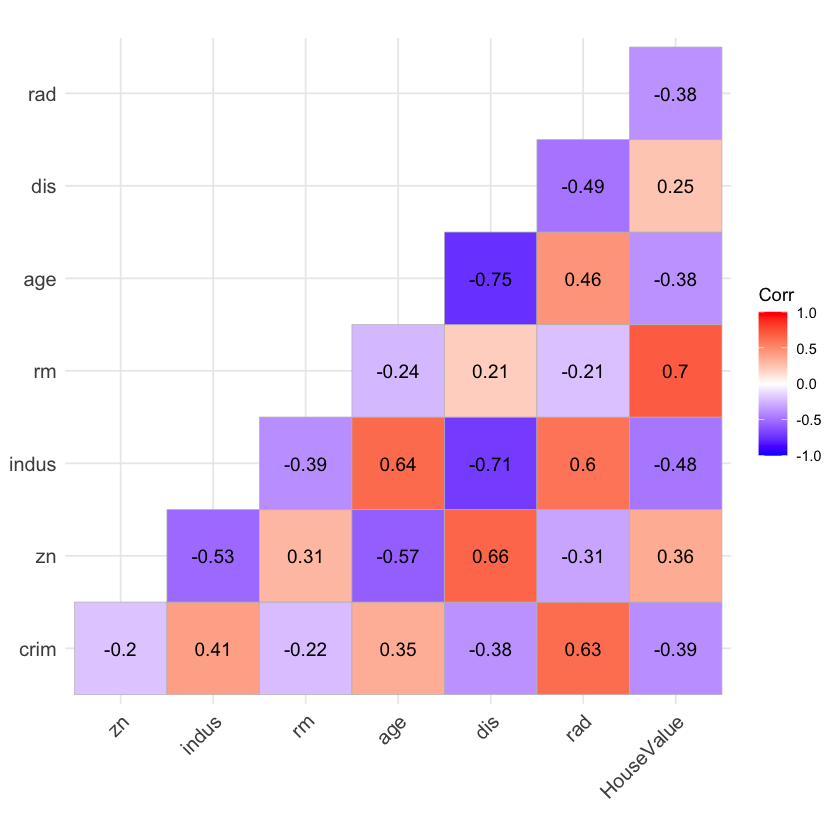

In [22]:
# Correlation matrix
cor_matrix <- cor(housing_df[, sapply(housing_df, is.numeric)])
print(cor_matrix)

# Visualize correlations
ggcorrplot(cor_matrix, lab=TRUE, type="lower")

good predictors
rm(0.7) more rooms higher value
zn(residential land zoning)  0.36

indus(-0.48) more industry = lower values
crim (-0.39) higher crime = lower values 

notably 
rad(highway accessibilty) more access = lower values?

interesting
dis(-0.49) distance from employmemnt low value 

Multicollinearity
age - dis (-0.75) old homes close to employment centers 
indus - age (0.64) industrial areaas have old homes

rad - indus (0.60) highway access close to industries

BIC factor analyis

# Visualise relationships 

`geom_smooth()` using formula = 'y ~ x'


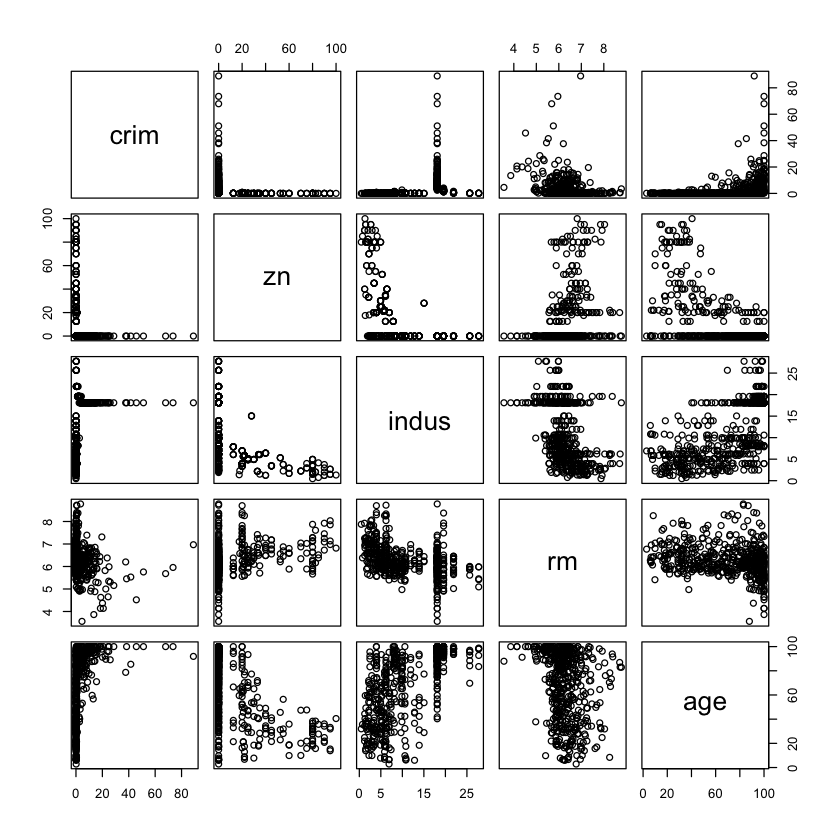

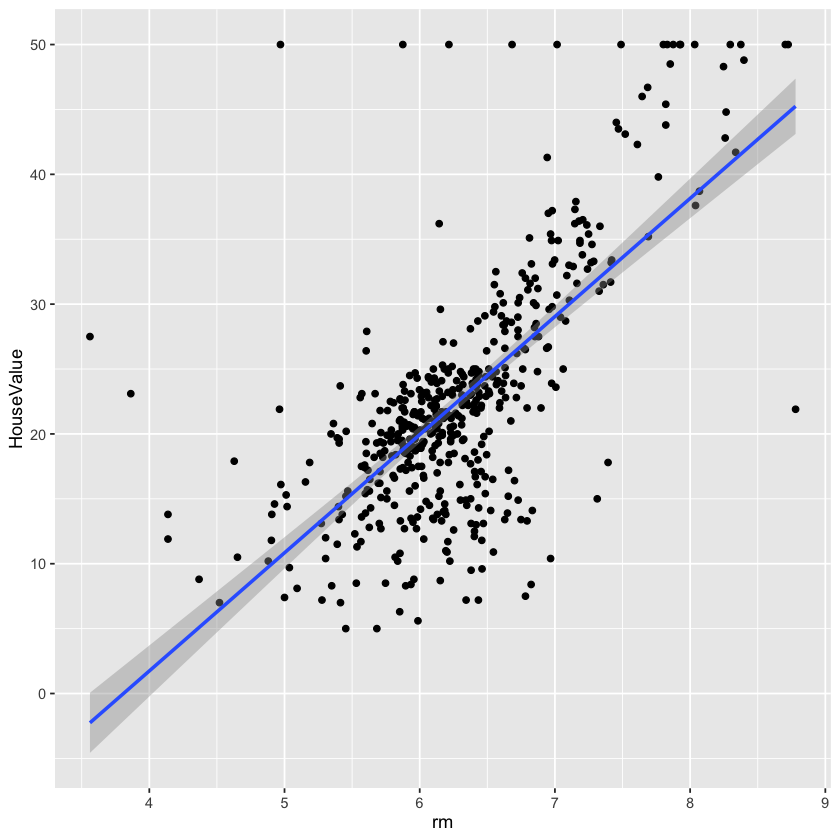

In [24]:
# Scatterplot matrix
pairs(housing_df[, 1:5])

# Individual relationships with target
library(ggplot2)
ggplot(housing_df, aes(x=rm, y=HouseValue)) +
  geom_point() +åç
  geom_smooth(method="lm")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


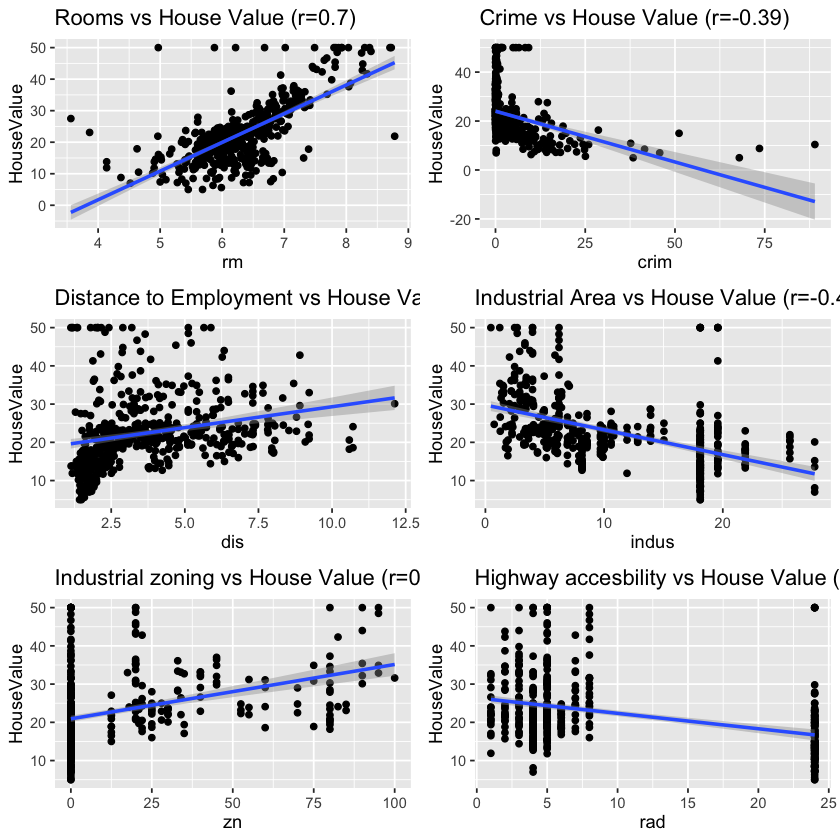

In [32]:


# Plot multiple important relationships
p1 <- ggplot(housing_df, aes(x=rm, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Rooms vs House Value (r=0.7)")

p2 <- ggplot(housing_df, aes(x=crim, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Crime vs House Value (r=-0.39)")

p3 <- ggplot(housing_df, aes(x=dis, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Distance to Employment vs House Value (r=-0.49)")

p4 <- ggplot(housing_df, aes(x=indus, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Industrial Area vs House Value (r=-0.48)")

p5 <- ggplot(housing_df, aes(x=zn, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Industrial zoning vs House Value (r=0.36)")

p6 <- ggplot(housing_df, aes(x=rad, y=HouseValue)) +
  geom_point() + geom_smooth(method="lm") +
  labs(title="Highway accesbility vs House Value (r=-0.38)")
# Display all together
grid.arrange(p1, p2, p3, p4, p5, p6, ncol=2)

### Split data

In [33]:
# 80/30 Train-Test Split
set.seed(123)
inTrain <- createDataPartition(housing_df$HouseValue, p = 0.8, list = F)
train_h <- housing_df[inTrain,]
test_h <- housing_df[-inTrain,]

# Save train and test datasets 
write.csv(train_h, "train_housing.csv", row.names = FALSE)
write.csv(test_h, "test_housing.csv", row.names = FALSE)

### Key Assumptions to Test:

1. **Normality of Residuals**
   - Test: Shapiro-Wilk test
   - Visualization: Q-Q plot

2. **Homoscedasticity** (Constant variance of residuals)
   - Qualitative: Plot residuals vs fitted values
   - Quantitative: NCV test (Non-Constant Variance Score test)
   - Breusch-Pagan test

3. **Independence of Errors**
   - Test: Durbin-Watson test

4. **Multicollinearity** (No linear relationship between predictors)
   - Test: VIF (Variance Inflation Factor)
   - VIF > 5 or 10 indicates multicollinearity

### Important Notes:

- **If normality and homoscedasticity are violated:** We can still proceed, but p-values may be biased
- **Implication:** Consider log transformation if needed
- **Multicollinearity handling:** BIC and AIC will find the best parameters that explain the model

In [36]:
# Fit full linear model on training data
h_lin_full_fit <- lm(HouseValue ~ ., data = train_h)
summary(h_lin_full_fit)


Call:
lm(formula = HouseValue ~ ., data = train_h)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.086  -3.126  -0.671   2.148  37.948 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.75817    3.99788  -0.690 0.490656    
crim            -0.20342    0.04552  -4.469 1.03e-05 ***
zn               0.04009    0.01851   2.165 0.030978 *  
indus           -0.30427    0.07674  -3.965 8.71e-05 ***
rm               6.40606    0.44101  14.526  < 2e-16 ***
age             -0.05876    0.01758  -3.343 0.000906 ***
dis             -1.34196    0.28179  -4.762 2.69e-06 ***
rad              0.02146    0.05677   0.378 0.705697    
NoxGroupsLow    -1.23220    1.46189  -0.843 0.399803    
NoxGroupsMedium -1.61677    1.04446  -1.548 0.122433    
ptRatioBin1     -3.37454    0.87461  -3.858 0.000133 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.724 on 396 degrees of freedom
Multiple R-squared:  0.6198,	A

## Test 1: Normality of Residuals

In [37]:
# Shapiro-Wilk test for normality of residuals
print("=== Shapiro-Wilk Normality Test ===")
shapiro_test <- shapiro.test(residuals(h_lin_full_fit))
print(shapiro_test)

# Interpretation
if (shapiro_test$p.value < 0.05) {
  print("Result: Residuals are NOT normally distributed (p < 0.05)")
} else {
  print("Result: Residuals are normally distributed (p >= 0.05)")
}

[1] "=== Shapiro-Wilk Normality Test ==="

	Shapiro-Wilk normality test

data:  residuals(h_lin_full_fit)
W = 0.8484, p-value < 2.2e-16

[1] "Result: Residuals are NOT normally distributed (p < 0.05)"


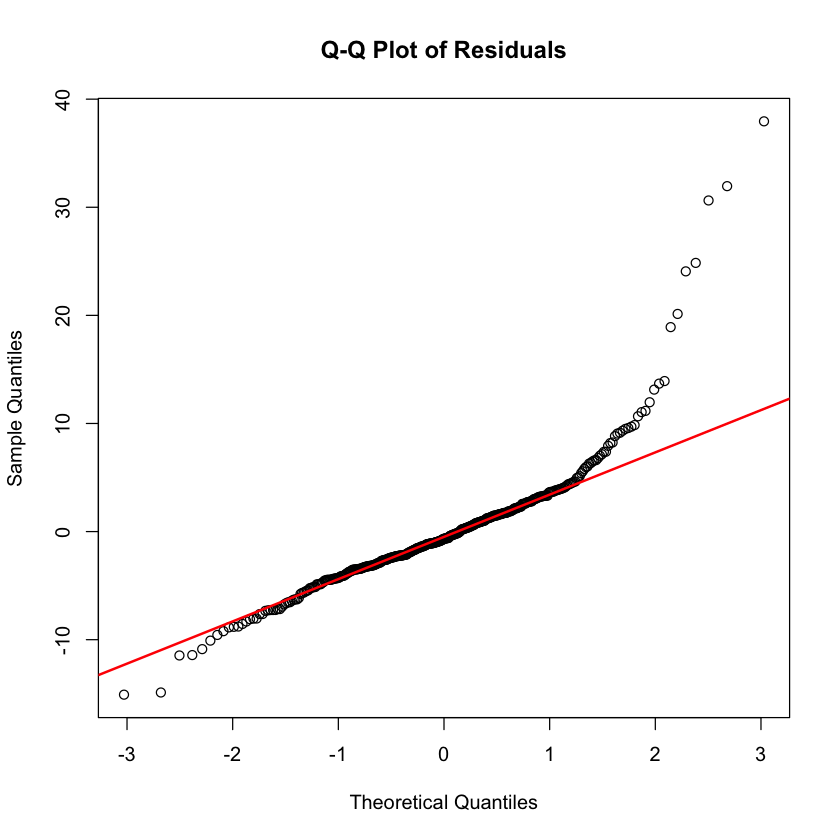

In [38]:
# Q-Q Plot for visual assessment of normality
qqnorm(residuals(h_lin_full_fit), main = "Q-Q Plot of Residuals")
qqline(residuals(h_lin_full_fit), col = "red", lwd = 2)

## Test 2: Homoscedasticity (Constant Variance)

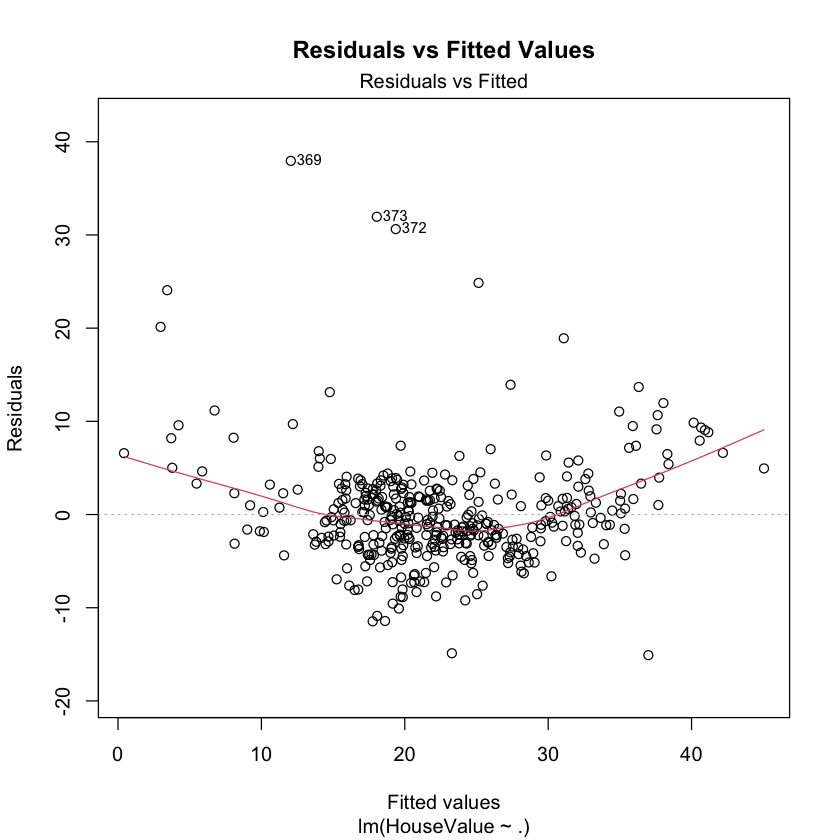

In [39]:
# Qualitative assessment: Residuals vs Fitted plot
plot(h_lin_full_fit, which = 1, main = "Residuals vs Fitted Values")

In [40]:

# Non-Constant Variance (NCV) test
library(car)
print("=== Non-Constant Variance Score Test ===")
ncv_test <- ncvTest(h_lin_full_fit)
print(ncv_test)

# Interpretation
if (ncv_test$p < 0.05) {
  print("Result: Non-constant variance detected (p < 0.05)")
} else {
  print("Result: Constant variance (p >= 0.05)")
}

[1] "=== Non-Constant Variance Score Test ==="
Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 15.06922, Df = 1, p = 0.00010364
[1] "Result: Non-constant variance detected (p < 0.05)"


## Test 3: Independence of Errors

In [41]:
# Durbin-Watson test for autocorrelation
print("=== Durbin-Watson Test ===")
dw_test <- durbinWatsonTest(h_lin_full_fit)
print(dw_test)

# Interpretation
cat("\nInterpretation:\n")
cat("DW statistic close to 2 = No autocorrelation\n")
cat("DW statistic < 2 = Positive autocorrelation\n")
cat("DW statistic > 2 = Negative autocorrelation\n\n")

if (dw_test$p < 0.05) {
  print("Result: Autocorrelation detected (p < 0.05)")
  print("Residuals are NOT independent")
} else {
  print("Result: No significant autocorrelation (p >= 0.05)")
  print("Residuals are independent")
}

[1] "=== Durbin-Watson Test ==="
 lag Autocorrelation D-W Statistic p-value
   1       0.5376939     0.9190245       0
 Alternative hypothesis: rho != 0

Interpretation:
DW statistic close to 2 = No autocorrelation
DW statistic < 2 = Positive autocorrelation
DW statistic > 2 = Negative autocorrelation

[1] "Result: Autocorrelation detected (p < 0.05)"
[1] "Residuals are NOT independent"


## Test 4: Multicollinearity

In [42]:
# Variance Inflation Factor (VIF) test
library(car)
print("=== Variance Inflation Factor (VIF) ===")
vif_values <- vif(h_lin_full_fit)
print(vif_values)

# Interpretation
cat("\n--- VIF Interpretation ---\n")
cat("VIF = 1: No correlation\n")
cat("VIF 1-5: Moderate correlation (acceptable)\n")
cat("VIF 5-10: High correlation (problematic)\n")
cat("VIF > 10: Very high correlation (remove variable)\n\n")

# Check which variables have high VIF
high_vif <- vif_values[vif_values > 5]
if (length(high_vif) > 0) {
  cat("⚠️ Variables with VIF > 5 (Multicollinearity concern):\n")
  print(high_vif)
} else {
  cat("✓ No variables with VIF > 5\n")
}

[1] "=== Variance Inflation Factor (VIF) ==="
               GVIF Df GVIF^(1/(2*Df))
crim       1.752870  1        1.323960
zn         2.191559  1        1.480392
indus      3.383286  1        1.839371
rm         1.283239  1        1.132801
age        2.902584  1        1.703697
dis        4.269309  1        2.066231
rad        3.106253  1        1.762457
NoxGroups  6.239570  2        1.580479
ptRatioBin 2.338083  1        1.529079

--- VIF Interpretation ---
VIF = 1: No correlation
VIF 1-5: Moderate correlation (acceptable)
VIF 5-10: High correlation (problematic)
VIF > 10: Very high correlation (remove variable)

⚠️ Variables with VIF > 5 (Multicollinearity concern):
[1] 6.23957


### BIC analyis to deal with overinflation of adjusted R

In [44]:
# We are done with testing and we are aware that some of the assumptions are violated.
# Next step is to perform model selection using stepwise regression
h_lin_step_model <- step(h_lin_full_fit, k = log(nrow(train_h)))
summary(h_lin_step_model)

Start:  AIC=1475.13
HouseValue ~ crim + zn + indus + rm + age + dis + rad + NoxGroups + 
    ptRatioBin

             Df Sum of Sq   RSS    AIC
- NoxGroups   2      84.1 13060 1465.8
- rad         1       4.7 12980 1469.3
- zn          1     153.6 13129 1473.9
<none>                    12976 1475.1
- age         1     366.3 13342 1480.5
- ptRatioBin  1     487.8 13463 1484.1
- indus       1     515.1 13491 1485.0
- crim        1     654.5 13630 1489.2
- dis         1     743.1 13719 1491.8
- rm          1    6913.8 19889 1643.0

Step:  AIC=1465.75
HouseValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin

             Df Sum of Sq   RSS    AIC
- rad         1      20.3 13080 1460.4
<none>                    13060 1465.8
- zn          1     262.5 13322 1467.8
- age         1     348.2 13408 1470.5
- indus       1     438.7 13498 1473.2
- ptRatioBin  1     576.0 13636 1477.3
- crim        1     612.4 13672 1478.4
- dis         1     929.5 13989 1487.7
- rm          1    6997.9 2


Call:
lm(formula = HouseValue ~ crim + zn + indus + rm + age + dis + 
    ptRatioBin, data = train_h)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.607  -3.128  -0.785   2.023  38.546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.81630    3.71622  -1.296 0.195717    
crim        -0.17964    0.04055  -4.430 1.22e-05 ***
zn           0.05082    0.01745   2.913 0.003779 ** 
indus       -0.24700    0.06906  -3.576 0.000391 ***
rm           6.47429    0.43790  14.785  < 2e-16 ***
age         -0.05504    0.01662  -3.312 0.001011 ** 
dis         -1.41648    0.25865  -5.476 7.70e-08 ***
ptRatioBin1 -3.16483    0.72872  -4.343 1.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.726 on 399 degrees of freedom
Multiple R-squared:  0.6167,	Adjusted R-squared:   0.61 
F-statistic: 91.71 on 7 and 399 DF,  p-value: < 2.2e-16


### Model comparison using BIC values

In [48]:
# Create all models from stepwise regression for comparison
# Model 1 (Initial): Full model with all variables including NoxGroups

# Similar to full model but explicitly defined
model_step0 <- lm(HouseValue ~ crim + zn + indus + rm + age + dis + rad + NoxGroups + ptRatioBin, data = train_h)


# Model 2 (Step 1): Removed NoxGroups
model_step1 <- lm(HouseValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin, data = train_h)

# Model 3 (Final/Best): Removed rad and NoxGroups
model_final <- lm(HouseValue ~ crim + zn + indus + rm + age + dis + ptRatioBin, data = train_h)

# Calculate BIC for all models
bic_step0 <- BIC(h_lin_full_fit)
bic_step1 <- BIC(model_step1)
bic_final <- BIC(h_lin_step_model)

# Create comparison table
model_comparison <- data.frame(
  Model = c("Step 0 (NoxGroups + rad)", "Step 1 (rad)", "Final (best)"),
  BIC = c(bic_step0, bic_step1, bic_final),
  NumPredictors = c(9, 8, 7)
)
print("BIC Comparison Table:")
print(model_comparison)

# Bayes Factor comparisons
# BF formula: BF = exp((BIC(Model1) - BIC(Model2))/2)
# BF > 1 means Model2 is more likely than Model1

print("\n--- Bayes Factor Analysis ---")
bf_step0_vs_step1 <- exp((bic_step0 - bic_step1)/2)
print(paste("BF (Full model vs Step1):", round(bf_step0_vs_step1, 2)))
print(paste("Step1 is", round(bf_step0_vs_step1, 2), "times more likely than Full model"))

# Step1 vs Final
bf_step1_vs_final <- exp((bic_step1 - bic_final)/2)
print(paste("\nBF (Step1 vs Final):", round(bf_step1_vs_final, 2)))
print(paste("Final is", round(bf_step1_vs_final, 2), "times more likely than Step1"))

# Step0 vs Final
bf_step0_vs_final <- exp((bic_step0 - bic_final)/2)
print(paste("\nBF (Full model vs Final):", round(bf_step0_vs_final, 2)))
print(paste("Final is", round(bf_step0_vs_final, 2), "times more likely than Full model"))

[1] "BIC Comparison Table:"
                     Model      BIC NumPredictors
1 Step 0 (NoxGroups + rad) 2636.158             9
2             Step 1 (rad) 2626.771             8
3             Final (best) 2621.393             7
[1] "\n--- Bayes Factor Analysis ---"
[1] "BF (Full model vs Step1): 109.27"
[1] "Step1 is 109.27 times more likely than Full model"
[1] "\nBF (Step1 vs Final): 14.72"
[1] "Final is 14.72 times more likely than Step1"
[1] "\nBF (Full model vs Final): 1607.87"
[1] "Final is 1607.87 times more likely than Full model"


### Using final model to make predictions

In [49]:
# Summary of the final model
summary(h_lin_step_model)


Call:
lm(formula = HouseValue ~ crim + zn + indus + rm + age + dis + 
    ptRatioBin, data = train_h)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.607  -3.128  -0.785   2.023  38.546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.81630    3.71622  -1.296 0.195717    
crim        -0.17964    0.04055  -4.430 1.22e-05 ***
zn           0.05082    0.01745   2.913 0.003779 ** 
indus       -0.24700    0.06906  -3.576 0.000391 ***
rm           6.47429    0.43790  14.785  < 2e-16 ***
age         -0.05504    0.01662  -3.312 0.001011 ** 
dis         -1.41648    0.25865  -5.476 7.70e-08 ***
ptRatioBin1 -3.16483    0.72872  -4.343 1.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.726 on 399 degrees of freedom
Multiple R-squared:  0.6167,	Adjusted R-squared:   0.61 
F-statistic: 91.71 on 7 and 399 DF,  p-value: < 2.2e-16


Using BIC for retention the final model had crim + zn + indus + rm + age + dis + ptRatioBin as predictors. The model explained 61% of the varience of house values on the training data. The model was signifcant and performed better than intercept only [F(7, 399) = 91.71, P < 0.001] and all predictors were signficant 

In [50]:
# Create predictions and evalaute model performance on test data
predictions <- predict(h_lin_step_model, newdata = test_h)

# Create predicitions using the full model for comparison
full_model_predictions <- predict(h_lin_full_fit, newdata = test_h)

### Linear model evaluations

In [59]:
# Calculate and print regression metrics
evaluate_regression <- function(actual, predicted) {
    mae_value <- mae(actual, predicted)
    mse_value <- mse(actual, predicted)
    rmse_value <- rmse(actual, predicted)
    r2_value <- R2(predicted, actual)
    print(paste("MAE on Test Data:", round(mae_value, 2)))
    print(paste("MSE on Test Data:", round(mse_value, 2)))
    print(paste("RMSE on Test Data:", round(rmse_value, 2)))
    print(paste("R-squared on Test Data:", round(r2_value, 4)))
}
# Call the function

print("Final Model Performance on Test Data:\n")
evaluate_regression(test_h$HouseValue, predictions)

print("\nFull Model Performance on Test Data:")
evaluate_regression(test_h$HouseValue, full_model_predictions)
    

[1] "Final Model Performance on Test Data:\n"
[1] "MAE on Test Data: 3.64"
[1] "MSE on Test Data: 29.1"
[1] "RMSE on Test Data: 5.39"
[1] "R-squared on Test Data: 0.6762"
[1] "\nFull Model Performance on Test Data:"
[1] "MAE on Test Data: 3.67"
[1] "MSE on Test Data: 29.26"
[1] "RMSE on Test Data: 5.41"
[1] "R-squared on Test Data: 0.6722"
[1] "\nCross-Validated Model Performance on Test Data:"
[1] "MAE on Test Data: 3.67"
[1] "MSE on Test Data: 29.26"
[1] "RMSE on Test Data: 5.41"
[1] "R-squared on Test Data: 0.6722"


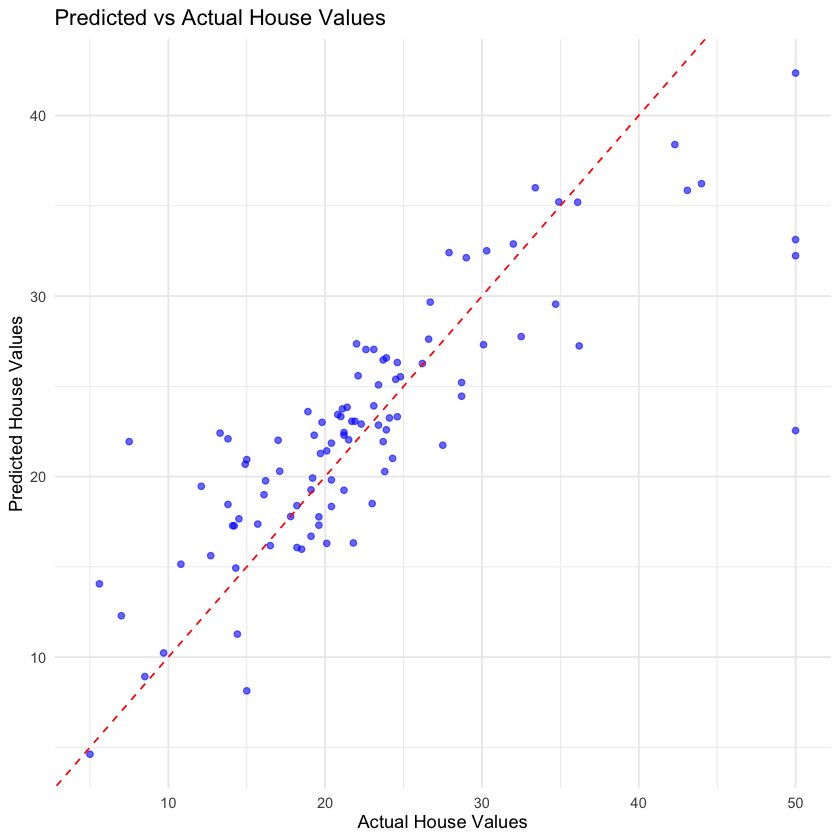

In [80]:
# Create visualizations of predicted vs actual values
library(ggplot2)
results_df <- data.frame(Actual = test_h$HouseValue, Predicted = predictions)
ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(color = 'blue', alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = 'red', linetype = 'dashed') +
  labs(title = "Predicted vs Actual House Values",
       x = "Actual House Values",
       y = "Predicted House Values") +
  theme_minimal()
  

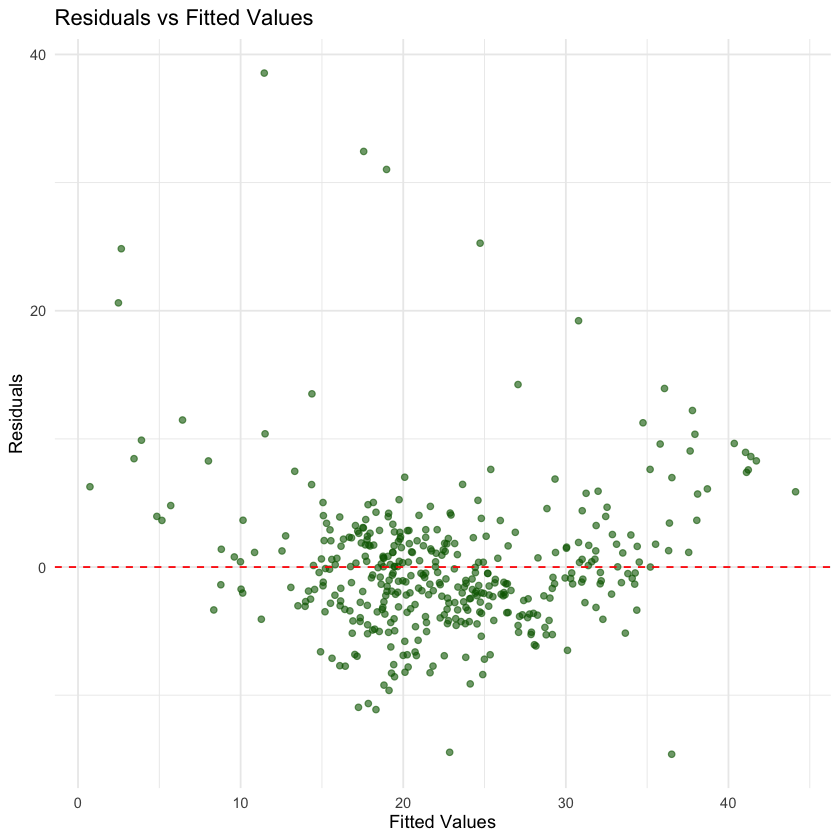

In [60]:
# Creae a residuals plot
residuals_df <- data.frame(Fitted = predict(h_lin_step_model), Residuals = residuals(h_lin_step_model))
ggplot(residuals_df, aes(x = Fitted, y = Residuals)) +
  geom_point(color = 'darkgreen', alpha = 0.6) +
  geom_hline(yintercept = 0, color = 'red', linetype = 'dashed') +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()

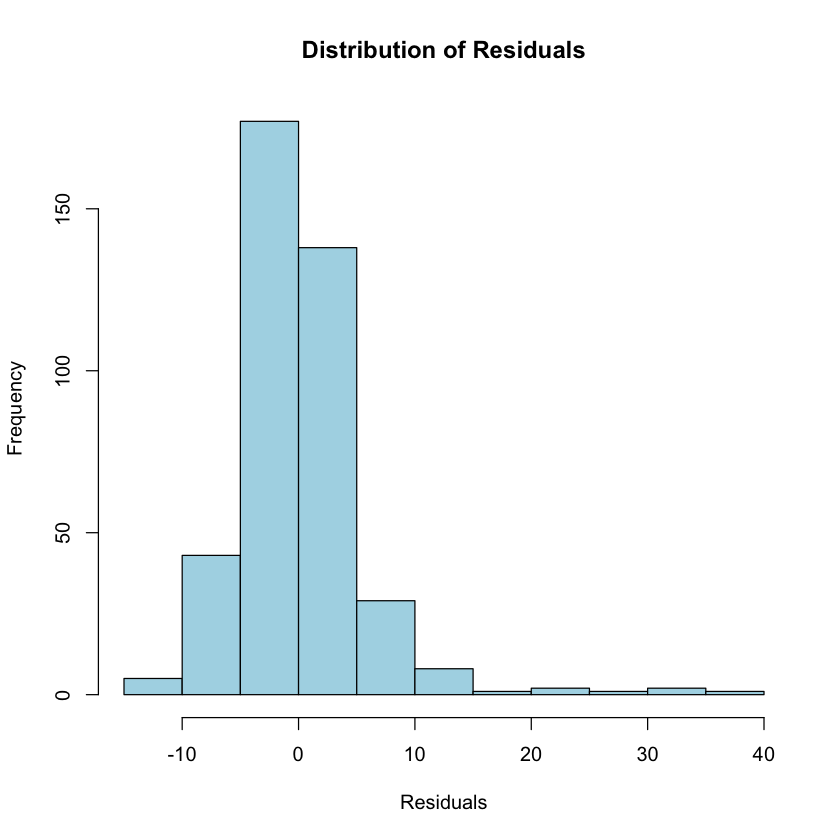

In [62]:
hist(residuals(h_lin_step_model), main = "Distribution of Residuals",
     xlab = "Residuals", col = "lightblue")

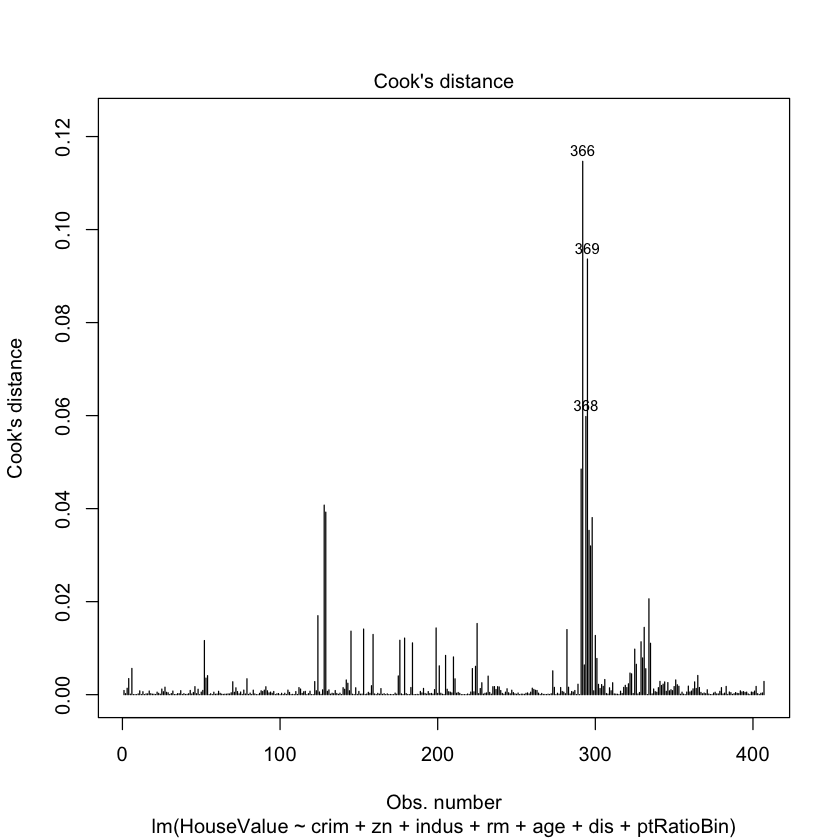

In [64]:
# Identify influential observations
plot(h_lin_step_model, which = 4)
cooks_d <- cooks.distance(h_lin_step_model)
influential <- which(cooks_d > 4/nrow(data))

## Binomial Logistic Regression

### Overview
Logistic regression returns **log odds**, which can be converted to probabilities using the exponential function.

### Interpreting Coefficients

**Assumption:** Holding other variables constant

#### For Continuous Predictors:
- For every 1-unit increase in the predictor, the **log odds** change by β
- **Interpretation:** `exp(β)` = odds ratio
  - If `exp(β) > 1`: Increased odds of being in category B
  - If `exp(β) < 1`: Decreased odds of being in category B
- **Percentage change in odds:** `(exp(β) - 1) × 100%`

#### For Categorical Predictors:
- Compared to the reference category
- **Interpretation:** `exp(β) - 1` gives the percentage change in odds
- Include **z-values** and **p-values** for significance testing

---

## Model Building Steps

### 1. Parametric Assumptions
✅ **Already tested from linear regression:**
- Independence of observations (Durbin-Watson test)
- No multicollinearity (VIF analysis)

### 2. Create Binary Target Variable

````r


In [78]:
# Create binary outcome based on median or meaningful threshold
median_value <- median(housing_df$HouseValue)
housing_df$HighValue <- ifelse(housing_df$HouseValue > median_value, 1, 0)
housing_df$HighValue <- as.factor(housing_df$HighValue)

# Drop HouseValue to avoid data leakage
housing_df$HouseValue <- NULL
head(housing_df)

,crim,zn,indus,rm,age,dis,rad,NoxGroups,ptRatioBin,HighValue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>
1,0.00632,18,2.31,6.575,65.2,4.0900,1,Medium,0,1
2,0.02731,0,7.07,6.421,78.9,4.9671,2,Low,0,1
3,0.02729,0,7.07,7.185,61.1,4.9671,2,Low,0,1
4,0.03237,0,2.18,6.998,45.8,6.0622,3,Low,0,1
5,0.06905,0,2.18,7.147,54.2,6.0622,3,Low,0,1
6,0.02985,0,2.18,6.430,58.7,6.0622,3,Low,0,1


### Class distribution analysis


  0   1 
256 250 


       0        1 
50.59289 49.40711 

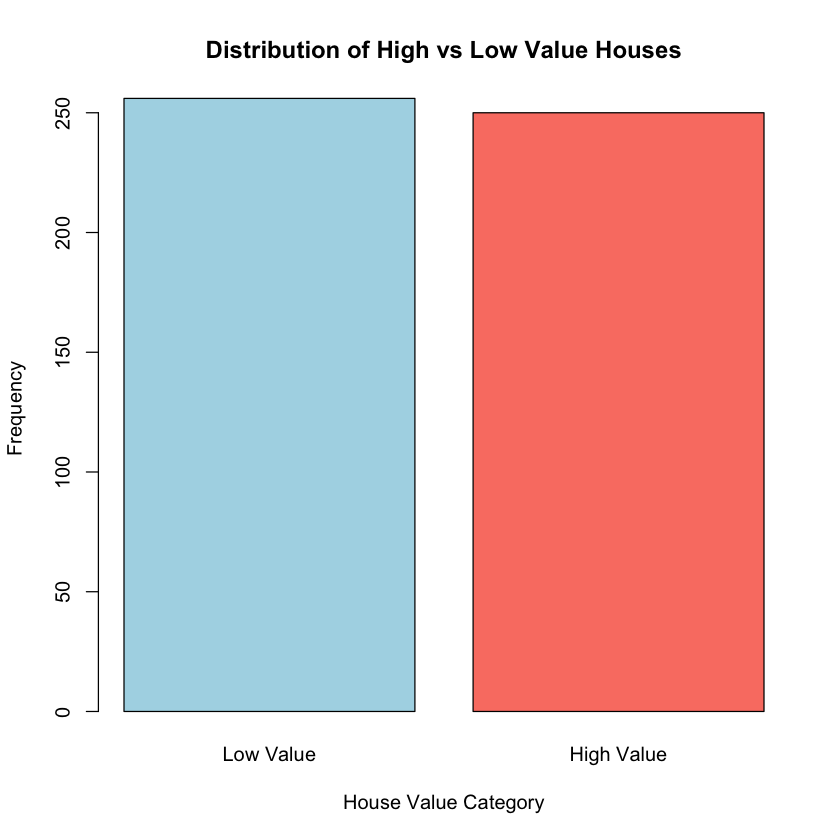

In [79]:
# Check class balance
table(housing_df$HighValue)
prop.table(table(housing_df$HighValue)) * 100

# Visualize class distribution
barplot(table(housing_df$HighValue), 
        main = "Distribution of High vs Low Value Houses",
        xlab = "House Value Category", 
        ylab = "Frequency",
        col = c("lightblue", "salmon"),
        names.arg = c("Low Value", "High Value"))

# A tibble: 2 × 5
  HighValue mean_rm mean_crim mean_dis mean_indus
  <fct>       <dbl>     <dbl>    <dbl>      <dbl>
1 0            5.93     6.28      3.17      14.3 
2 1            6.65     0.883     4.44       7.87


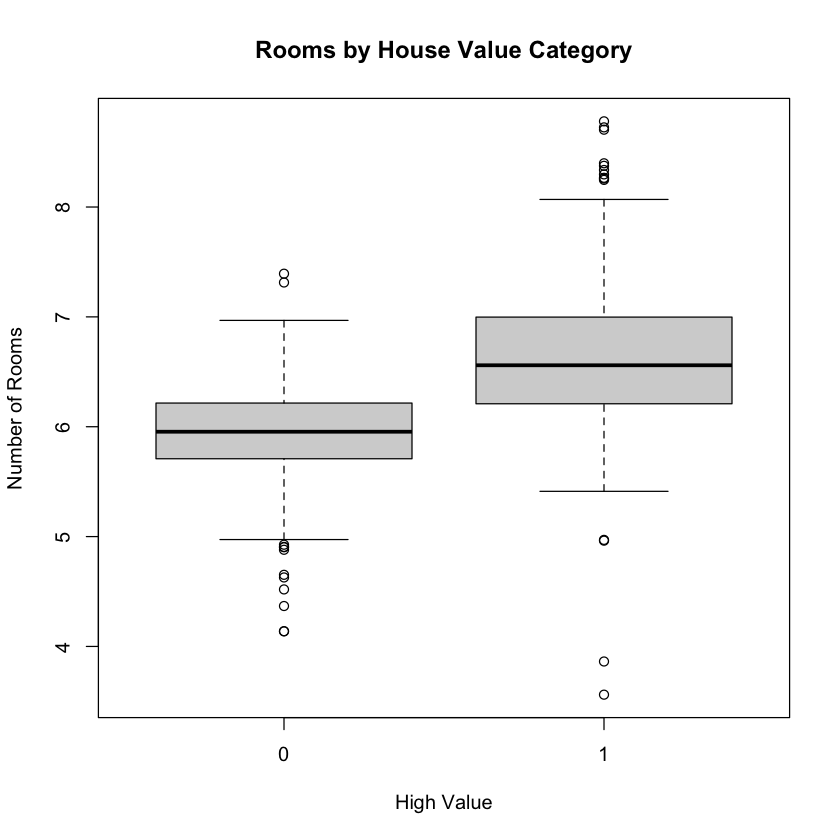

In [80]:
# Compare predictor means between groups

# For numeric predictors
group_stats <- housing_df %>%
  group_by(HighValue) %>%
  summarise(
    mean_rm = mean(rm),
    mean_crim = mean(crim),
    mean_dis = mean(dis),
    mean_indus = mean(indus)
  )
print(group_stats)

# Visual comparison
boxplot(rm ~ HighValue, data = housing_df, 
        main = "Rooms by House Value Category",
        xlab = "High Value", ylab = "Number of Rooms")


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(housing_df$HighValue, housing_df$ptRatioBin)
X-squared = 126.95, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(housing_df$HighValue, housing_df$NoxGroups)
X-squared = 99.198, df = 2, p-value < 2.2e-16


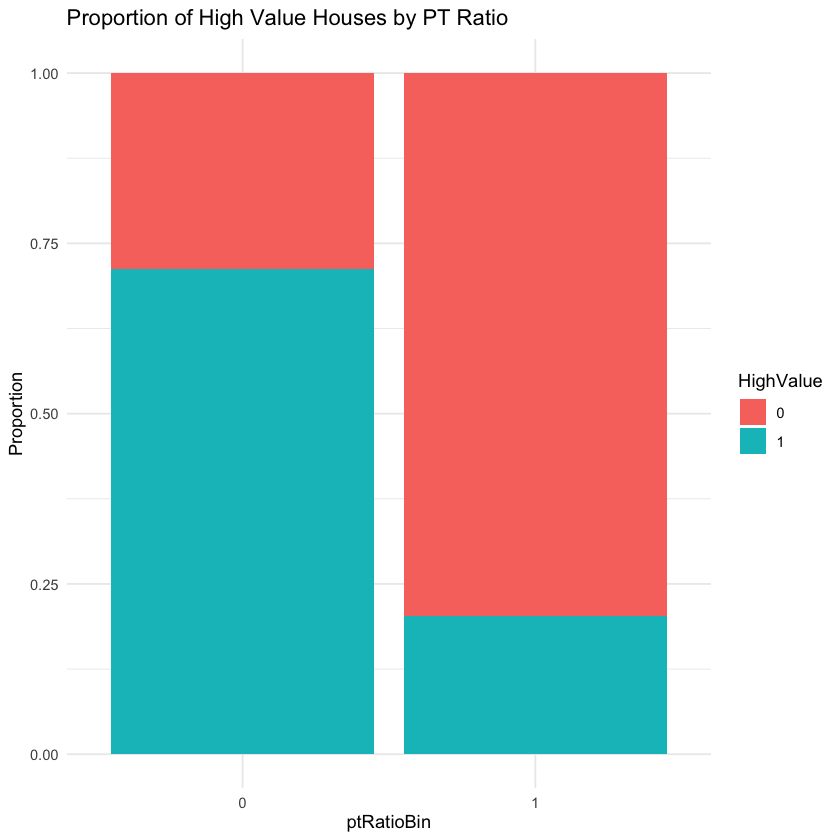

In [81]:
# Test association between categorical predictors and outcome
chisq.test(table(housing_df$HighValue, housing_df$ptRatioBin))
chisq.test(table(housing_df$HighValue, housing_df$NoxGroups))

# Visualize associations
library(ggplot2)
ggplot(housing_df, aes(x = ptRatioBin, fill = HighValue)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of High Value Houses by PT Ratio",
       y = "Proportion") +
  theme_minimal()

## Log odds analysis

In [83]:
inTrain <- createDataPartition(housing_df$HighValue, p = 0.8, list = F)
train_h <- housing_df[inTrain,]
test_h <- housing_df[-inTrain,]

In [104]:
# logistic regression model
logistic_full_model <- glm(HighValue ~ ., 
                      data = train_h, family = binomial)
summary(logistic_full_model)


Call:
glm(formula = HighValue ~ ., family = binomial, data = train_h)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -8.619760   2.666119  -3.233 0.001225 ** 
crim            -0.227559   0.079885  -2.849 0.004392 ** 
zn               0.009165   0.011658   0.786 0.431799    
indus           -0.072478   0.043553  -1.664 0.096087 .  
rm               2.337493   0.393220   5.944 2.77e-09 ***
age             -0.042027   0.009315  -4.512 6.43e-06 ***
dis             -0.415699   0.150924  -2.754 0.005881 ** 
rad              0.097117   0.035356   2.747 0.006018 ** 
NoxGroupsLow    -0.462209   0.765754  -0.604 0.546109    
NoxGroupsMedium -0.586826   0.566593  -1.036 0.300338    
ptRatioBin1     -1.595430   0.411553  -3.877 0.000106 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 561.39  on 404  degrees of freedom
Residual deviance: 301.82  on 394  deg

In [105]:
# Calculate lodds ratios for all with p < 0.05
significant_vars <- summary(logistic_full_model)$coefficients
significant_vars <- significant_vars[significant_vars[,4] < 0.05, ]
odds_ratios <- round(exp(significant_vars[,1]), digits = 4)
print("Odds Ratios for Significant Predictors:")
print(odds_ratios)

[1] "Odds Ratios for Significant Predictors:"
(Intercept)        crim          rm         age         dis         rad 
     0.0002      0.7965     10.3552      0.9588      0.6599      1.1020 
ptRatioBin1 
     0.2028 


In [106]:
model_zn_alone <- glm(HighValue ~ zn, data = train_h, family = binomial)
model_indus_alone <- glm(HighValue ~ indus, data = train_h, family = binomial)

# Then test interactions if needed
model_zn_indus_inter <- glm(HighValue ~ zn * indus, data = train_h, family = binomial)

# Print summaries
print("\n--- Model: zn alone ---\n")
print(summary(model_zn_alone))
print("\n--- Model: indus alone ---\n")
print(summary(model_indus_alone))  
print("\n--- Model: zn * indus interaction ---\n")
print(summary(model_zn_indus_inter))

[1] "\n--- Model: zn alone ---\n"

Call:
glm(formula = HighValue ~ zn, family = binomial, data = train_h)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.412050   0.114800  -3.589 0.000332 ***
zn           0.042659   0.007385   5.776 7.64e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 561.39  on 404  degrees of freedom
Residual deviance: 503.49  on 403  degrees of freedom
AIC: 507.49

Number of Fisher Scoring iterations: 5

[1] "\n--- Model: indus alone ---\n"

Call:
glm(formula = HighValue ~ indus, family = binomial, data = train_h)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.79290    0.22496   7.970 1.59e-15 ***
indus       -0.16538    0.01819  -9.093  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance:

In [108]:
step_logistic_model <- step(logistic_full_model, k = log(nrow(train_h)))
summary(step_logistic_model)

Start:  AIC=367.86
HighValue ~ crim + zn + indus + rm + age + dis + rad + NoxGroups + 
    ptRatioBin

             Df Deviance    AIC
- NoxGroups   2   303.01 357.05
- zn          1   302.46 362.50
- indus       1   304.77 364.81
<none>            301.82 367.86
- rad         1   309.72 369.76
- dis         1   309.86 369.90
- crim        1   315.46 375.50
- ptRatioBin  1   318.13 378.17
- age         1   326.09 386.13
- rm          1   357.98 418.02

Step:  AIC=357.05
HighValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin

             Df Deviance    AIC
- zn          1   304.18 352.21
- indus       1   304.94 352.97
<none>            303.01 357.05
- rad         1   310.98 359.01
- dis         1   312.01 360.04
- crim        1   315.52 363.55
- ptRatioBin  1   322.71 370.74
- age         1   328.65 376.68
- rm          1   360.66 408.69

Step:  AIC=352.21
HighValue ~ crim + indus + rm + age + dis + rad + ptRatioBin

             Df Deviance    AIC
- indus       1   305.99 3


Call:
glm(formula = HighValue ~ crim + rm + age + dis + rad + ptRatioBin, 
    family = binomial, data = train_h)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.187116   2.383251  -4.694 2.68e-06 ***
crim         -0.199982   0.074611  -2.680  0.00736 ** 
rm            2.509505   0.382133   6.567 5.13e-11 ***
age          -0.043372   0.008768  -4.946 7.56e-07 ***
dis          -0.270734   0.108233  -2.501  0.01237 *  
rad           0.086327   0.034301   2.517  0.01184 *  
ptRatioBin1  -1.718682   0.374787  -4.586 4.52e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 561.39  on 404  degrees of freedom
Residual deviance: 305.99  on 398  degrees of freedom
AIC: 319.99

Number of Fisher Scoring iterations: 7


In [ ]:
## BIC analysis and comparison for logistic regression

final_formula <- formula(step_logistic_model)
print("Final Model Formula:")
print(final_formula)

# Model 0 (Full Model): All predictors
model_log_0 <- glm(HighValue ~ ., 
                   data = train_h, 
                   family = binomial)

# Model 1: Remove the least significant variable from full model
model_log_1 <- glm(HighValue ~ crim + zn + indus + rm + age + dis + rad + ptRatioBin, 
                   data = train_h, 
                   family = binomial)

# Model 2: Remove another variable
model_log_2 <- glm(HighValue ~crim + indus + rm + age + dis + rad + ptRatioBin, 
                   data = train_h, 
                   family = binomial)

# Model 3: Final/Best model (from stepwise)
model_log_final <- step_logistic_model

# Calculate BIC for all models
bic_log_0 <- BIC(model_log_0)
bic_log_1 <- BIC(model_log_1)
bic_log_2 <- BIC(model_log_2)
bic_log_final <- BIC(model_log_final)

# Create comparison table
logistic_model_comparison <- data.frame(
  Model = c("Full Model", "Step 1", "Step 2", "Final Model"),
  BIC = c(bic_log_0, bic_log_1, bic_log_2, bic_log_final),
  NumPredictors = c(
    length(coef(model_log_0)) - 1,
    length(coef(model_log_1)) - 1,
    length(coef(model_log_2)) - 1,
    length(coef(model_log_final)) - 1
  )
)

print("BIC Comparison Table (Logistic Regression):")
print(logistic_model_comparison)

# Bayes Factor comparisons
# BF formula: BF = exp((BIC(Model1) - BIC(Model2))/2)
# BF > 1 means Model2 is more likely than Model1

print("\n--- Bayes Factor Analysis ---")

bf_0_vs_1 <- exp((bic_log_0 - bic_log_1)/2)
print(paste("BF (Full vs Step1):", round(bf_0_vs_1, 2)))
print(paste("Step1 is", round(bf_0_vs_1, 2), "times more likely than Full model"))

bf_1_vs_2 <- exp((bic_log_1 - bic_log_2)/2)
print(paste("\nBF (Step1 vs Step2):", round(bf_1_vs_2, 2)))
print(paste("Step2 is", round(bf_1_vs_2, 2), "times more likely than Step1"))

bf_2_vs_final <- exp((bic_log_2 - bic_log_final)/2)
print(paste("\nBF (Step2 vs Final):", round(bf_2_vs_final, 2)))
print(paste("Final is", round(bf_2_vs_final, 2), "times more likely than Step2"))

# Overall comparison: Full vs Final
bf_0_vs_final <- exp((bic_log_0 - bic_log_final)/2)
print(paste("\nBF (Full model vs Final):", round(bf_0_vs_final, 2)))
print(paste("Final is", round(bf_0_vs_final, 2), "times more likely than Full model"))

# Calculate McFadden's Pseudo R² for all models
null_model <- glm(HighValue ~ 1, data = train_h, family = binomial)

pseudoR2_0 <- 1 - (logLik(model_log_0) / logLik(null_model))
pseudoR2_1 <- 1 - (logLik(model_log_1) / logLik(null_model))
pseudoR2_2 <- 1 - (logLik(model_log_2) / logLik(null_model))
pseudoR2_final <- 1 - (logLik(model_log_final) / logLik(null_model))

logistic_model_comparison$McFadden_PseudoR2 <- c(
  pseudoR2_0, pseudoR2_1, pseudoR2_2, pseudoR2_final
)

print("\nUpdated Comparison Table with McFadden's Pseudo R²:")
print(logistic_model_comparison)

[1] "Final Model Formula:"
HighValue ~ crim + rm + age + dis + rad + ptRatioBin
[1] "BIC Comparison Table (Logistic Regression):"
        Model      BIC NumPredictors
1  Full Model 367.8607            10
2      Step 1 357.0453             8
3      Step 2 352.2118             7
4 Final Model 348.0167             6
[1] "\n--- Bayes Factor Analysis ---"
[1] "BF (Full vs Step1): 223.12"
[1] "Step1 is 223.12 times more likely than Full model"
[1] "\nBF (Step1 vs Step2): 11.21"
[1] "Step2 is 11.21 times more likely than Step1"
[1] "\nBF (Step2 vs Final): 8.15"
[1] "Final is 8.15 times more likely than Step2"
[1] "\nBF (Full model vs Final): 20374.43"
[1] "Final is 20374.43 times more likely than Full model"
[1] "\nUpdated Comparison Table with McFadden's Pseudo R²:"
        Model      BIC NumPredictors McFadden_PseudoR2
1  Full Model 367.8607            10         0.4623714
2      Step 1 357.0453             8         0.4602474
3      Step 2 352.2118             7         0.4581627
4 Final M

### Evaluating Logistic Regression

In [125]:
# make predictions on test data
logistic_predictions_prob <- predict(step_logistic_model, newdata = test_h, type = "response")
logistic_predictions <- ifelse(logistic_predictions_prob > 0.5, 1, 0)

# Evaluate classification performance using confusion matrix
confusion_mat <- confusionMatrix(as.factor(logistic_predictions), as.factor(test_h$HighValue), positive = "1")
print("Confusion Matrix:")
print(confusion_mat)

[1] "Confusion Matrix:"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 41  8
         1 10 42
                                         
               Accuracy : 0.8218         
                 95% CI : (0.733, 0.8908)
    No Information Rate : 0.505          
    P-Value [Acc > NIR] : 3.55e-11       
                                         
                  Kappa : 0.6437         
                                         
 Mcnemar's Test P-Value : 0.8137         
                                         
            Sensitivity : 0.8400         
            Specificity : 0.8039         
         Pos Pred Value : 0.8077         
         Neg Pred Value : 0.8367         
             Prevalence : 0.4950         
         Detection Rate : 0.4158         
   Detection Prevalence : 0.5149         
      Balanced Accuracy : 0.8220         
                                         
       'Positive' Class : 1              
                                

In [ ]:
## C

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.9188"


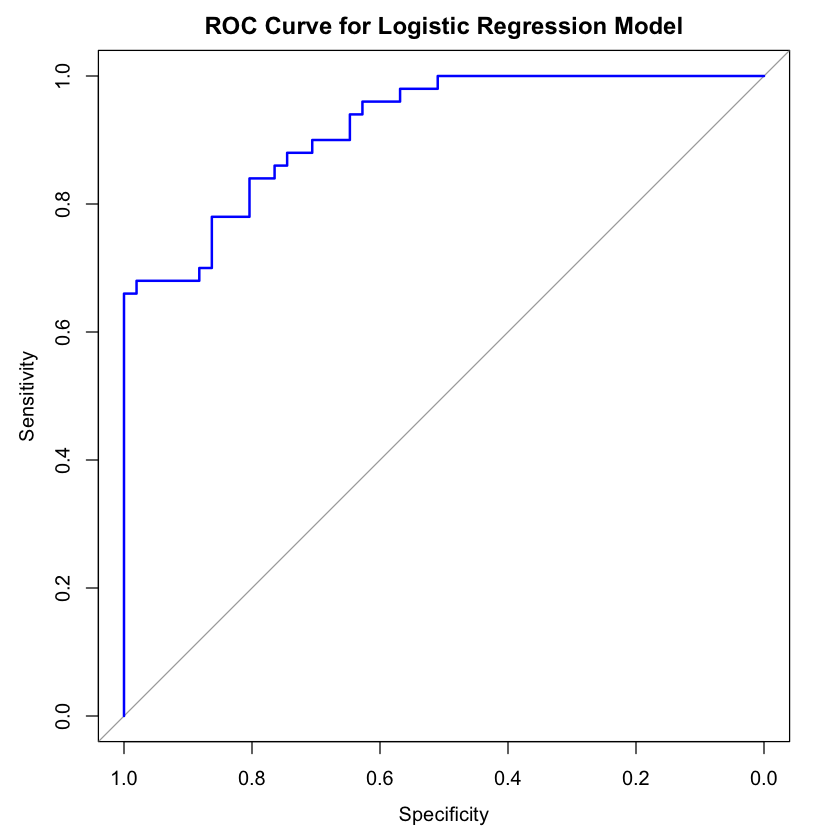

In [121]:
# Roc curve
roc_curve <- roc(test_h$HighValue, logistic_predictions_prob)
plot(roc_curve, main = "ROC Curve for Logistic Regression Model", col = "blue", lwd = 2)
auc_value <- auc(roc_curve)
print(paste("AUC:", round(auc_value, 4)))

In [ ]:
# Calculating the best cuttoff point using pROC package
roc_obj <- roc(test_h$HighValue, logistic_predictions_prob)
best_coords <- coords(roc_obj, "best", ret = "threshold", transpose = FALSE)

print("Best Cutoff Point:")
print(best_coords)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "Best Cutoff Point:"
  threshold
1 0.7537899


[1] "Precision-Recall-F1 at Different Thresholds:"
                Threshold Precision Recall  F1_Score
Pos Pred Value        0.1 0.5617978   1.00 0.7194245
Pos Pred Value1       0.2 0.6250000   1.00 0.7692308
Pos Pred Value2       0.3 0.6621622   0.98 0.7903226
Pos Pred Value3       0.4 0.7121212   0.94 0.8103448
Pos Pred Value4       0.5 0.8076923   0.84 0.8235294
Pos Pred Value5       0.6 0.8409091   0.74 0.7872340
Pos Pred Value6       0.7 0.8717949   0.68 0.7640449
Pos Pred Value7       0.8 1.0000000   0.62 0.7654321
Pos Pred Value8       0.9 1.0000000   0.50 0.6666667


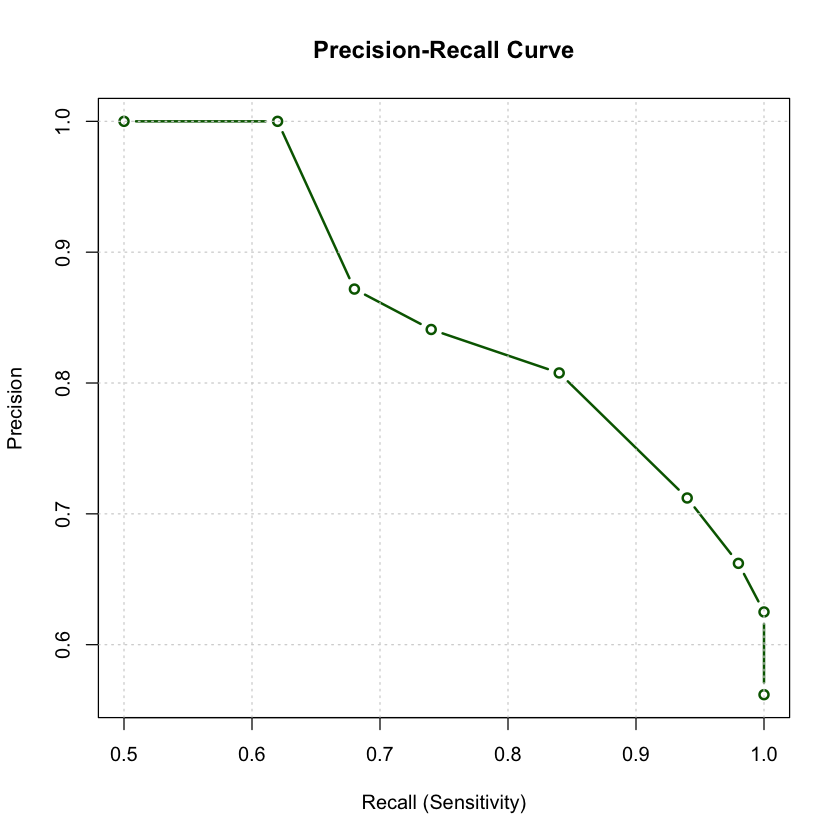

In [ ]:
# Calculate at different thresholds
thresholds <- seq(0.1, 0.9, 0.1)
pr_data <- data.frame(
  Threshold = numeric(),
  Precision = numeric(),
  Recall = numeric(),
  F1_Score = numeric()
)

for (thresh in thresholds) {
  pred_class <- ifelse(logistic_predictions_prob > thresh, "1", "0")
  cm <- confusionMatrix(as.factor(pred_class), as.factor(test_h$HighValue), positive = "1")
  
  precision <- cm$byClass["Pos Pred Value"]
  recall <- cm$byClass["Sensitivity"]
  f1 <- 2 * (precision * recall) / (precision + recall)
  
  pr_data <- rbind(pr_data, data.frame(
    Threshold = thresh,
    Precision = precision,
    Recall = recall,
    F1_Score = f1
  ))
}

print("Precision-Recall-F1 at Different Thresholds:")
print(pr_data)

plot(pr_data$Recall, pr_data$Precision, 
     type = "b", col = "darkgreen", lwd = 2,
     main = "Precision-Recall Curve",
     xlab = "Recall (Sensitivity)", ylab = "Precision")
grid()

[1] "\n3. CALIBRATION CURVE (Predicted vs Observed Probabilities)"
[1] "--------------------------------------------------------------------------------"
[1] "Calibration Data:"
         Bin Predicted_Prob Observed_Prob
1    [0-0.1)     0.04856246     0.0000000
2  [0.1-0.2)     0.16280117     0.0000000
3  [0.2-0.3)     0.25606901     0.1666667
4  [0.3-0.4)     0.34736214     0.2500000
5  [0.4-0.5)     0.44706575     0.3571429
6  [0.5-0.6)     0.54941411     0.6250000
7  [0.6-0.7)     0.66260026     0.6000000
8  [0.7-0.8)     0.75141604     0.3750000
9  [0.8-0.9)     0.84969638     1.0000000
10   [0.9-1)     0.96811587     1.0000000


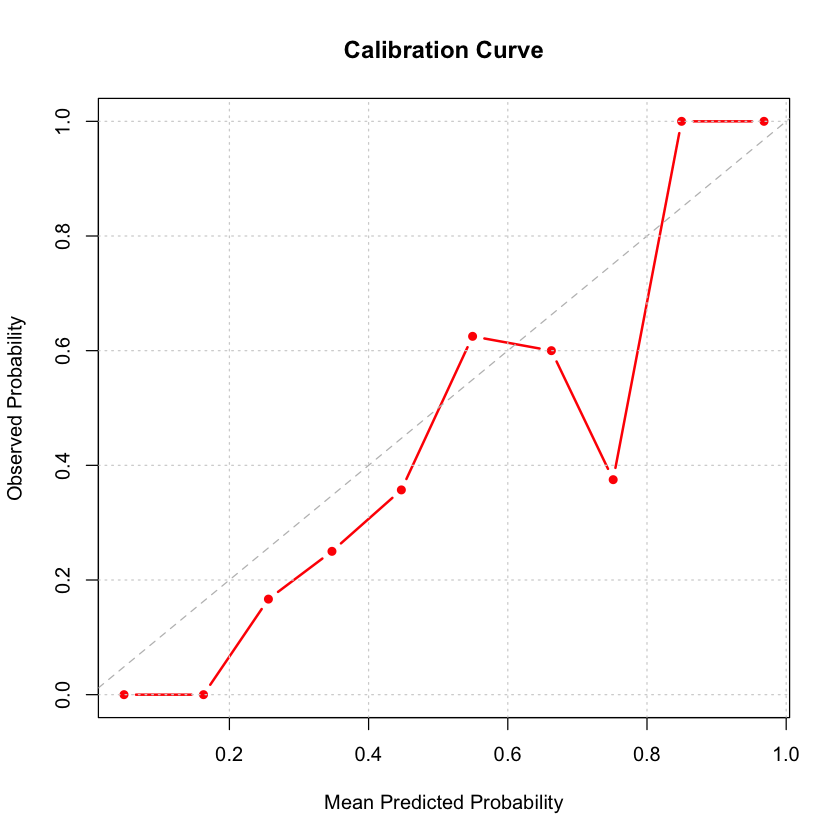

In [ ]:
# 3. CALIBRATION CURVE
print("\n3. CALIBRATION CURVE (Predicted vs Observed Probabilities)")
print(strrep("-", 80))

# Bin predictions and compare to actual
bins <- seq(0, 1, 0.1)
calib_data <- data.frame(
  Bin = character(),
  Predicted_Prob = numeric(),
  Observed_Prob = numeric()
)

for (i in 1:(length(bins)-1)) {
  mask <- logistic_predictions_prob >= bins[i] & logistic_predictions_prob < bins[i+1]
  if (sum(mask) > 0) {
    pred_prob <- mean(logistic_predictions_prob[mask])
    obs_prob <- mean(as.numeric(test_h$HighValue[mask]) - 1) 
    
    calib_data <- rbind(calib_data, data.frame(
      Bin = paste0("[", round(bins[i], 1), "-", round(bins[i+1], 1), ")"),
      Predicted_Prob = pred_prob,
      Observed_Prob = obs_prob
    ))
  }
}

print("Calibration Data:")
print(calib_data)

plot(calib_data$Predicted_Prob, calib_data$Observed_Prob,
     type = "b", col = "red", lwd = 2, pch = 16,
     main = "Calibration Curve",
     xlab = "Mean Predicted Probability",
     ylab = "Observed Probability")
abline(0, 1, col = "gray", lty = 2)  
grid()

## Decision trees
Simple decision trees 
Only bic analyis 

Random Forest trees vs full model vs step_model